# EDA on million playlist data

Since the complete dataset is too large, a subset of 10% is used for EDA here.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Combine the first 100 csv files
dfs=[]
for i in range(0,100):
    filename='songs'+str(i)+'.csv'
    df=pd.read_csv(filename)
    df['pid']+= i*1000
    dfs.append(df)
df_final=pd.concat(dfs)
df_final.to_csv('test0-99.csv', encoding='utf-8', index=False)
del dfs
del df_final

In [3]:
#load data
# df1=pd.read_csv('test0-99.csv')
df1=pd.read_csv('/Users/haoxinli/DocumentsLocal/Spotify/test0-99.csv')

In [4]:
#overview
df1.head()

pid  pos        artist_name                             track_uri  \
0    0    0      Missy Elliott  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
1    0    1     Britney Spears  spotify:track:6I9VzXrHxO9rA9A5euc8Ak   
2    0    2            Beyoncé  spotify:track:0WqIKmW4BTrj3eJFmnCKMv   
3    0    3  Justin Timberlake  spotify:track:1AWQoqb9bSvzTjaLralEkT   
4    0    4             Shaggy  spotify:track:1lzr43nnXAijIGYnCT8M8H   

                              artist_uri  \
0  spotify:artist:2wIVse2owClT7go1WT98tk   
1  spotify:artist:26dSoYclwsYLMAKD3tpOr4   
2  spotify:artist:6vWDO969PvNqNYHIOW5v0m   
3  spotify:artist:31TPClRtHm23RisEBtV3X7   
4  spotify:artist:5EvFsr3kj42KNv97ZEnqij   

                                   track_name  \
0  Lose Control (feat. Ciara & Fat Man Scoop)   
1                                       Toxic   
2                               Crazy In Love   
3                              Rock Your Body   
4                                It Wasn't Me   

                              album_uri  duration_ms  \
0  spotify:album:6vV5UrXcfyQD1wu4Qo2I9K       226863   
1  spotify:album:0z7pVBGOD7HCIB7S8eLkLI       198800   
2  spotify:album:25hVFAxTlDvXbx2X2QkUkE       235933   
3  spotify:album:6QPkyl04rXwTGlGlcYaRoW       267266   
4  spotify:album:6NmFmPX56pcLBOFMhIiKvF       227600   

                                     album_name  
0                                  The Cookbook  
1                                   In The Zone  
2  Dangerously In Love (Alben für die Ewigkeit)  
3                                     Justified  
4                                      Hot Shot

In [5]:
df1.shape

(6677800, 9)

For each playlist, we have data on track name, artist, album and length of the songs.

In [6]:
len(df1['track_uri'].unique())

681805

In [7]:
len(df1['artist_uri'].unique())

110063

In [8]:
len(df1['album_uri'].unique())

271413

Over these 100000 playlists, there are 681805 different songs, 110063 different artists and 271413 different albums covered.

In [9]:
df1_track=df1.groupby(['pid'])['track_uri'].unique()
df1_artist=df1.groupby(['pid'])['artist_uri'].unique()
df1_album=df1.groupby(['pid'])['album_uri'].unique()

In [10]:
track_1=np.zeros(len(df1_track), dtype=int)
for i in range(len(df1_track)):
    track_1[i]=len(df1_track[i])  
    
artist_1=np.zeros(len(df1_artist), dtype=int)
for i in range(len(df1_artist)):
    artist_1[i]=len(df1_artist[i])  
    
album_1=np.zeros(len(df1_album), dtype=int)
for i in range(len(df1_album)):
    album_1[i]=len(df1_album[i]) 

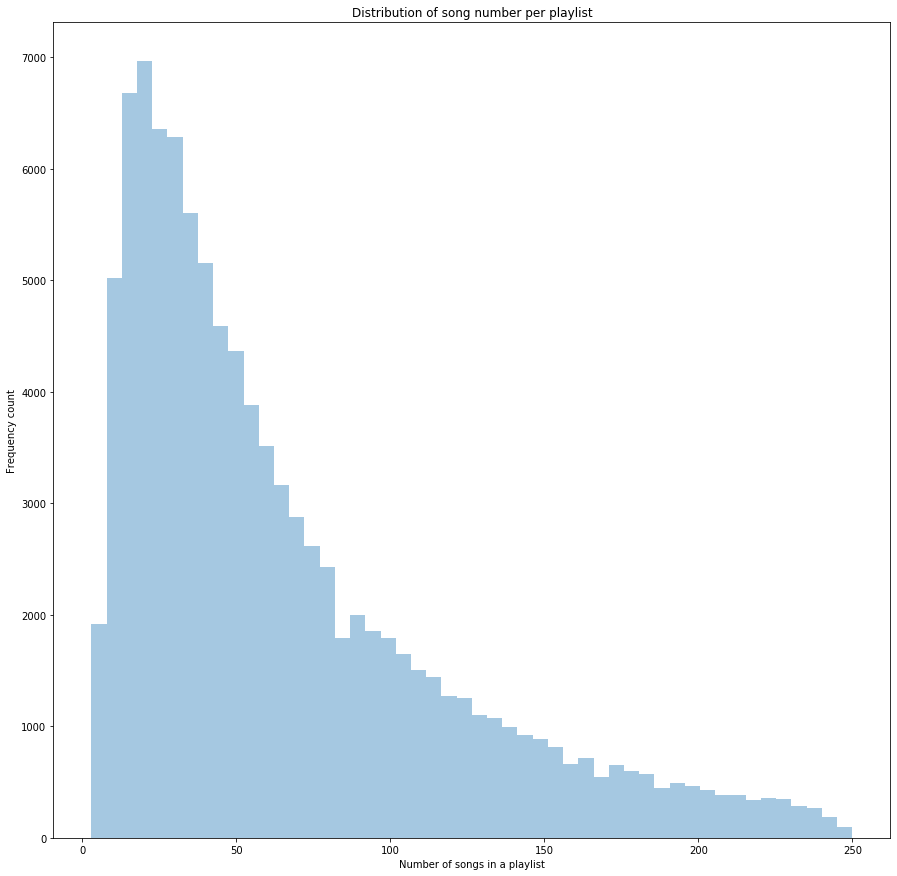

In [9]:
plt.figure(figsize=(15,15))
sns.distplot(track_1,kde=False)
plt.xlabel("Number of songs in a playlist")
plt.ylabel("Frequency count")
plt.title("Distribution of song number per playlist")
plt.show()

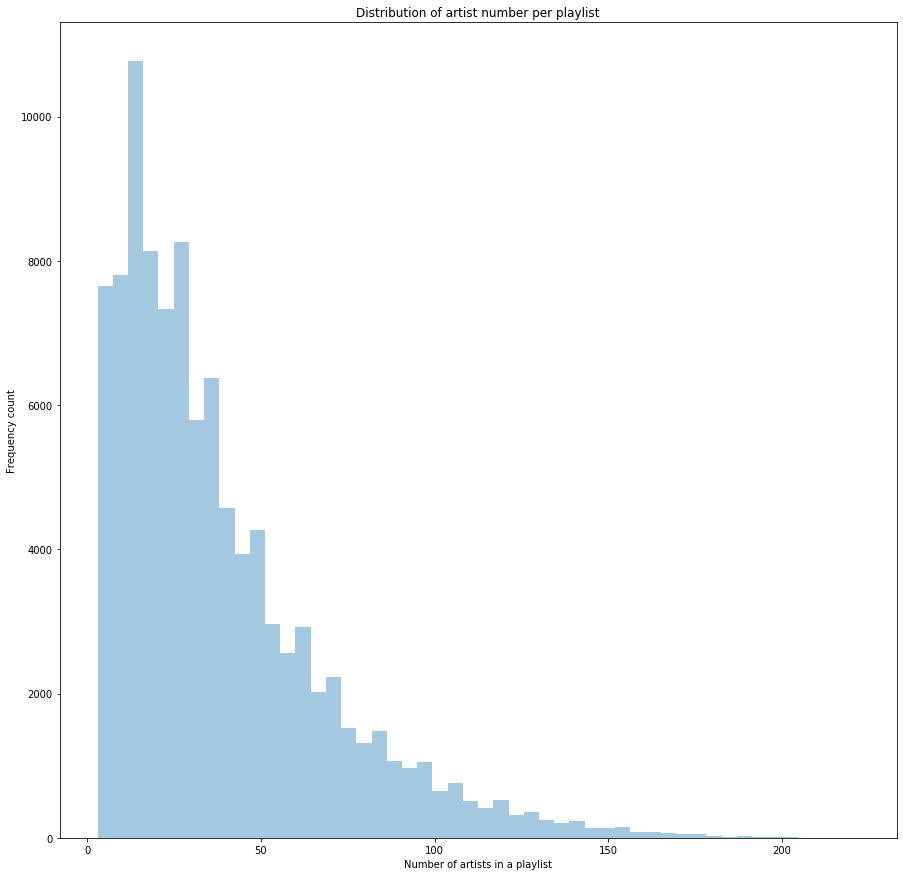

In [10]:
plt.figure(figsize=(15,15))
sns.distplot(artist_1,kde=False)
plt.xlabel("Number of artists in a playlist")
plt.ylabel("Frequency count")
plt.title("Distribution of artist number per playlist")
plt.show()

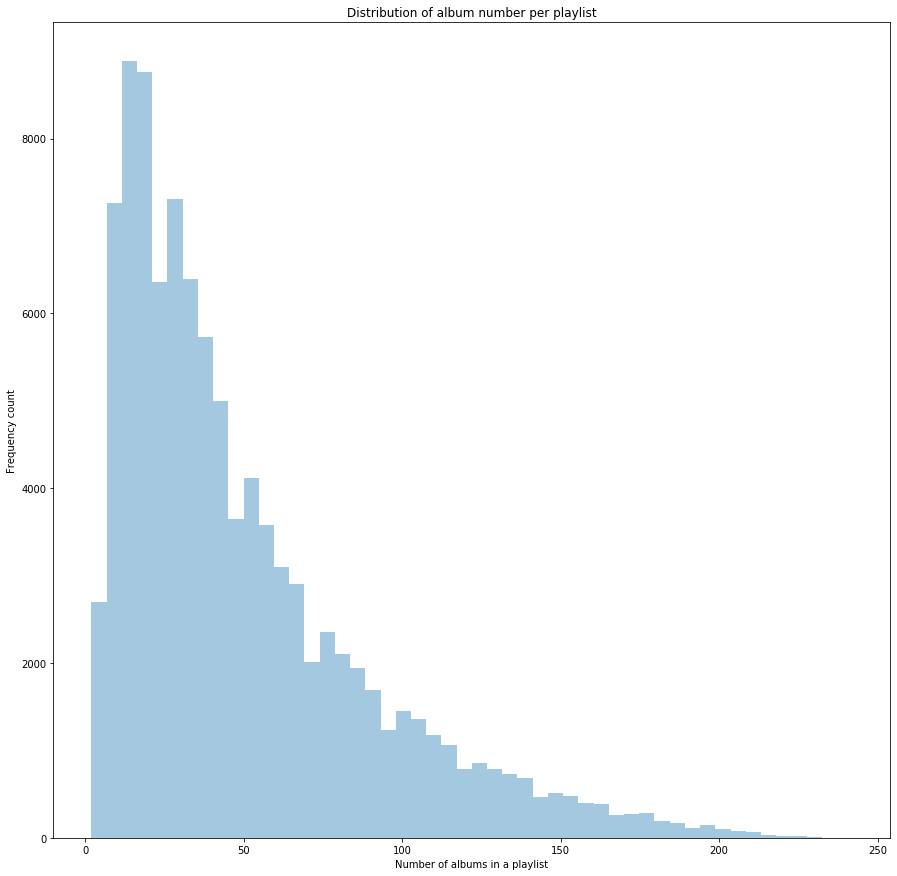

In [11]:
plt.figure(figsize=(15,15))
sns.distplot(album_1,kde=False)
plt.xlabel("Number of albums in a playlist")
plt.ylabel("Frequency count")
plt.title("Distribution of album number per playlist")
plt.show()

The histograms show that distribution of songs/artists/albums number are quite skewed. 

In [12]:
df1_summary = pd.DataFrame({'Number of songs per playlist': track_1, 
                            'Number of artists per playlist': artist_1, 
                            'Number of albums per playlist': album_1})


In [13]:
df1_summary.describe()

Number of songs per playlist  Number of artists per playlist  \
count                 100000.000000                   100000.000000   
mean                      65.890790                       38.121690   
std                       52.849538                       30.171495   
min                        3.000000                        3.000000   
25%                       26.000000                       16.000000   
50%                       49.000000                       30.000000   
75%                       91.000000                       52.000000   
max                      250.000000                      222.000000   

       Number of albums per playlist  
count                  100000.000000  
mean                       49.789870  
std                        39.888158  
min                         2.000000  
25%                        20.000000  
50%                        37.000000  
75%                        68.000000  
max                       242.000000

Next, We explore what are the TOP 50 most popular songs/artists.

In [11]:
track_freq=df1.groupby( [ "track_name", "track_uri","artist_name",'artist_uri'] ).size().to_frame(name = 'Hits').reset_index()
track_freq=track_freq.sort_values("Hits", ascending=False)
track_freq.columns = ['Track name', 'Track uri', 'Artist name','Artist uri', 'Hits']
track_freq['Track-Artist']=track_freq['Track name'].astype(str) + '|'+track_freq['Artist name']


In [18]:
track_freq

Track name                             Track uri  \
225532                      HUMBLE.  spotify:track:7KXjTSCq5nL1LoYtL7XAwS   
417135                    One Dance  spotify:track:1xznGGDReH1oQq0xzbwXa3   
106031                       Closer  spotify:track:7BKLCZ1jbUBVqRi2FVlTVw   
79481   Broccoli (feat. Lil Yachty)  spotify:track:7yyRTcZmCiyzzJlNzGC9Ol   
114371              Congratulations  spotify:track:3a1lNhkSLSkpJE4MSHpDu9   
...                             ...                                   ...   
172490               Every Disguise  spotify:track:28258dLgC8WMmrQMaZnss8   
172492       Every Dog Has It's Day  spotify:track:53PZwcg1L5I8O7CDScAwbI   
172493        Every Dog Has Its Day  spotify:track:3LsbzLkEE8KPhCrsexnWZl   
413225                   Okie Dokie  spotify:track:4pTRdaoZepzdPLdS4CiLxu   
0                           !!!!!!!  spotify:track:2i0gNbCr1S9eyf4Cj1Nr5i   

             Artist name                             Artist uri  Hits  \
225532    Kendrick Lamar  spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg  4441   
417135             Drake  spotify:artist:3TVXtAsR1Inumwj472S9r4  4240   
106031  The Chainsmokers  spotify:artist:69GGBxA162lTqCwzJG5jLp  4145   
79481               DRAM  spotify:artist:5M0lbkGluOPXLeFjApw8r8  4073   
114371       Post Malone  spotify:artist:246dkjvS1zLTtiykXe5h60  3936   
...                  ...                                    ...   ...   
172490            Lusine  spotify:artist:2fMe9lZs5HGGOwh8cMSIub     1   
172492    Flogging Molly  spotify:artist:5kQGFREO5FzMBMsAO3cEtj     1   
172493    Flogging Molly  spotify:artist:5kQGFREO5FzMBMsAO3cEtj     1   
413225        Dan Deacon  spotify:artist:5Z3IWpvwOvoaWodujHw7xh     1   
0              The Roots  spotify:artist:78xUyw6FkVZrRAtziFdtdu     1   

                                 Track-Artist  
225532                 HUMBLE.|Kendrick Lamar  
417135                        One Dance|Drake  
106031                Closer|The Chainsmokers  
79481        Broccoli (feat. Lil Yachty)|DRAM  
114371            Congratulations|Post Malone  
...                                       ...  
172490                  Every Disguise|Lusine  
172492  Every Dog Has It's Day|Flogging Molly  
172493   Every Dog Has Its Day|Flogging Molly  
413225                  Okie Dokie|Dan Deacon  
0                           !!!!!!!|The Roots  

[681805 rows x 6 columns]

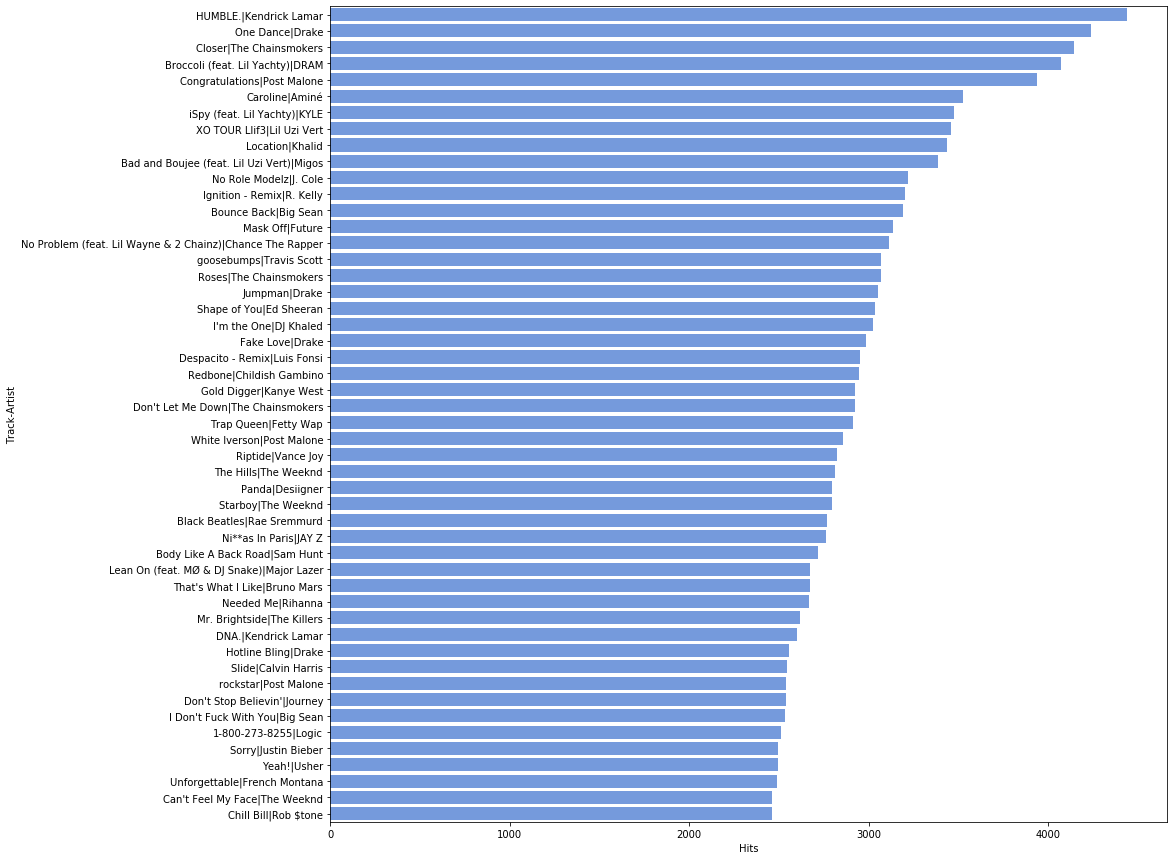

In [16]:
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Track-Artist", color='cornflowerblue',data=track_freq[:50])
plt.show()

In [17]:
artist_freq=df1.groupby( [ "artist_name",'artist_uri'] ).size().to_frame(name = 'Hits').reset_index()
artist_freq=artist_freq.sort_values("Hits", ascending=False)
artist_freq.columns = ['Artist name','Artist uri', 'Hits']

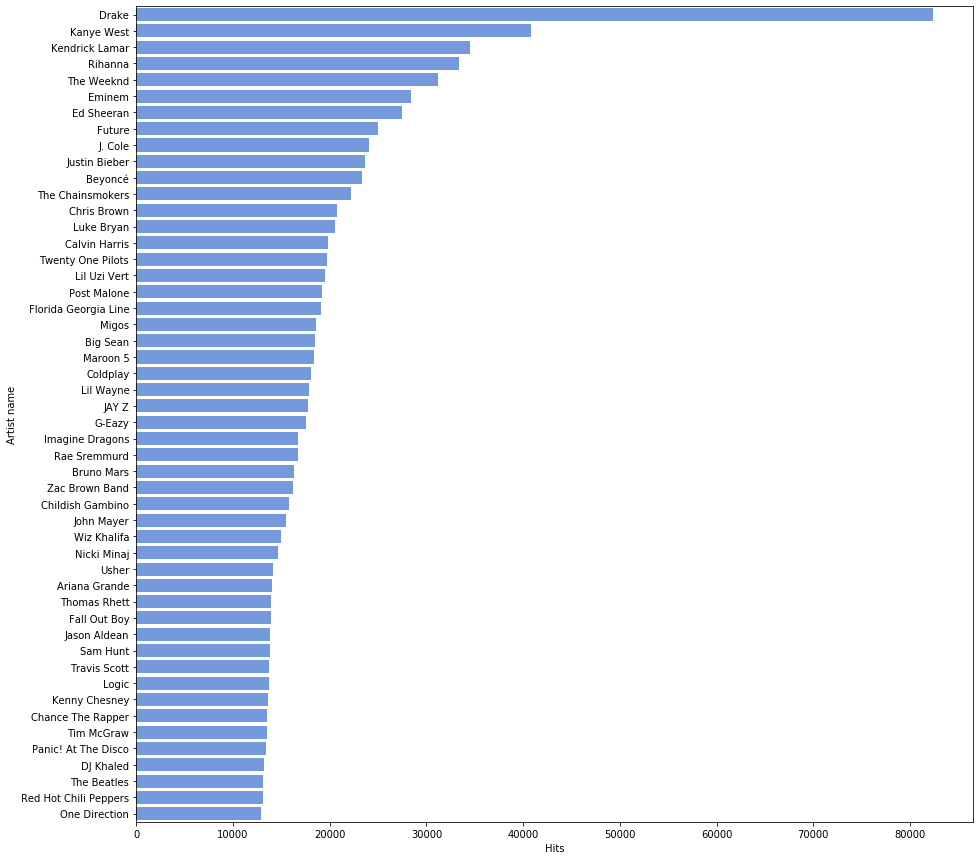

In [18]:
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Artist name", color='cornflowerblue',data=artist_freq[:50])
plt.show()

In [19]:
len(set(track_freq['Artist uri'][:50]))

39

In [20]:
len(set(track_freq['Artist uri'][:50]).intersection(set(artist_freq['Artist uri'][:50])))

25

In [21]:
intersec=set(set(track_freq['Artist uri'][:50]).intersection(set(artist_freq['Artist uri'][:50])))
i=0
for each in list(track_freq['Artist uri'][:50]):
    if each in intersec:
        i+=1
        
print(i)

36


Among the TOP 50 artists, 25 of them own credit for the TOP 50 songs. Among the TOP 50 songs, 36 of them come from TOP 50 artists. The popularity of songs and corresponding artists are highly correlated.